In [3]:
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install numpy

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [60]:
df=pd.read_csv("Customer Churn.csv")

In [61]:
df.head(25)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing blanks in total charges with 0..this was resulting due to 0 recorded in tenure

In [10]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [20]:
# df.describe(include="all")
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [23]:
df["customerID"].duplicated().sum()

0

#convert 0 and 1 to No and Yes respectively for easier readability

In [62]:
# def conv(value):
#     if value == "1":
#         return "Yes"
#     else:
#         return "No"

# df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
df["SeniorCitizen"] = df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head(25)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


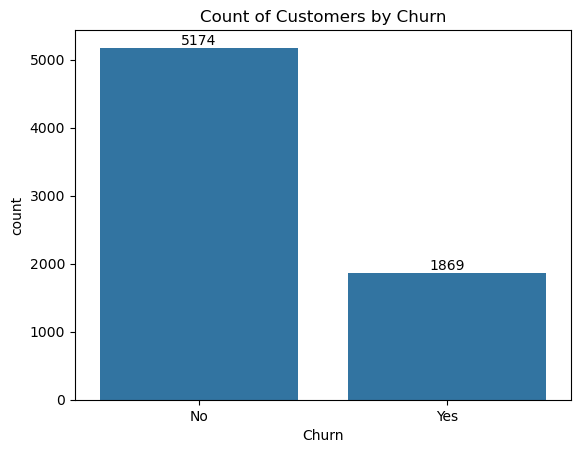

In [63]:
ax=sns.countplot(x='Churn',data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

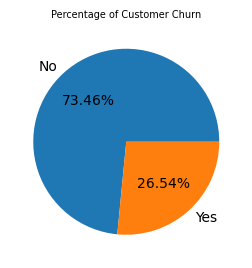

In [43]:
gb=df.groupby("Churn").agg({'Churn':'count'})
plt.figure(figsize=(3,4))
plt.pie(gb['Churn'],labels=gb.index,autopct="%1.2f%%")
plt.title("Percentage of Customer Churn",fontsize=7)
plt.show()

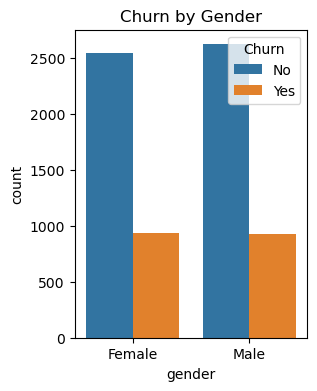

In [49]:
plt.figure(figsize=(3,4))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

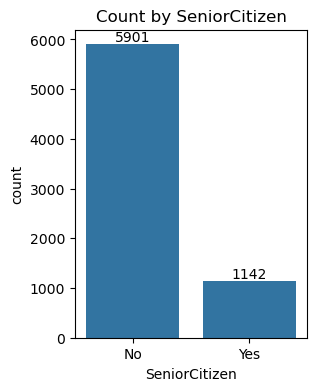

In [76]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count by SeniorCitizen")
plt.show()

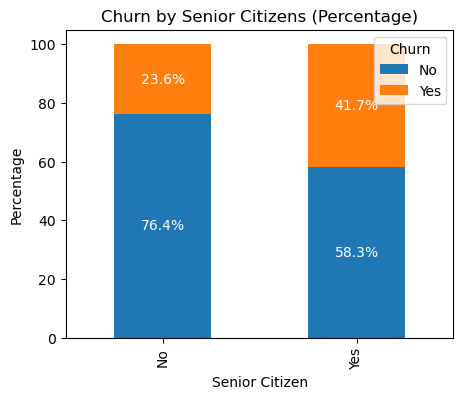

In [73]:
# Create a crosstab of SeniorCitizen vs Churn
ct = pd.crosstab(df["SeniorCitizen"], df["Churn"], normalize="index") * 100

# Plot stacked bar chart
ax = ct.plot(kind="bar", stacked=True, figsize=(5,4))

# Add percentage labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center", color="white", fontsize=10)

plt.title("Churn by Senior Citizens (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen")
plt.legend(title="Churn", loc="upper right")
plt.show()

#comparitively a greater percentage of people in senior citizen category have churned

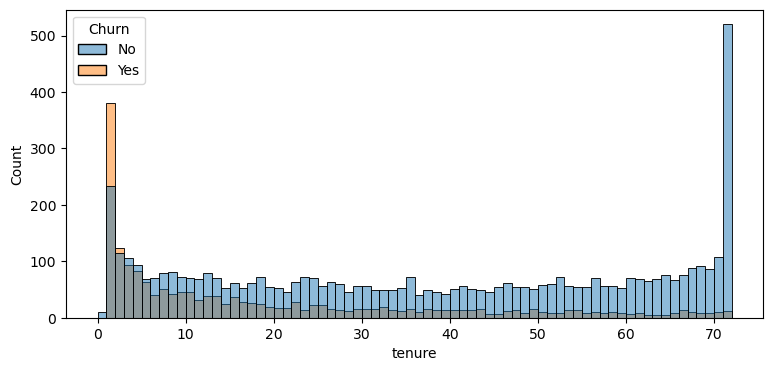

In [82]:
plt.figure(figsize=(9,4))
sns.histplot(x="tenure",data=df,bins=72,hue="Churn")
plt.show()
#people who have been using our services for a long time have stayed, and people who are new to our services (1-2 months) tend to leave

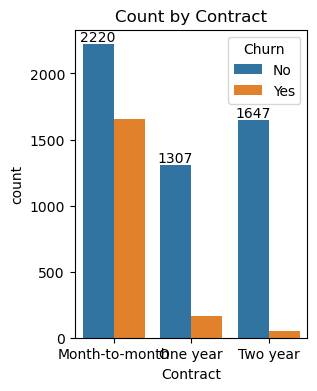

In [84]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x="Contract",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count by Contract")
plt.show()

#people who have month-to-month contract are more likely to churn

In [87]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

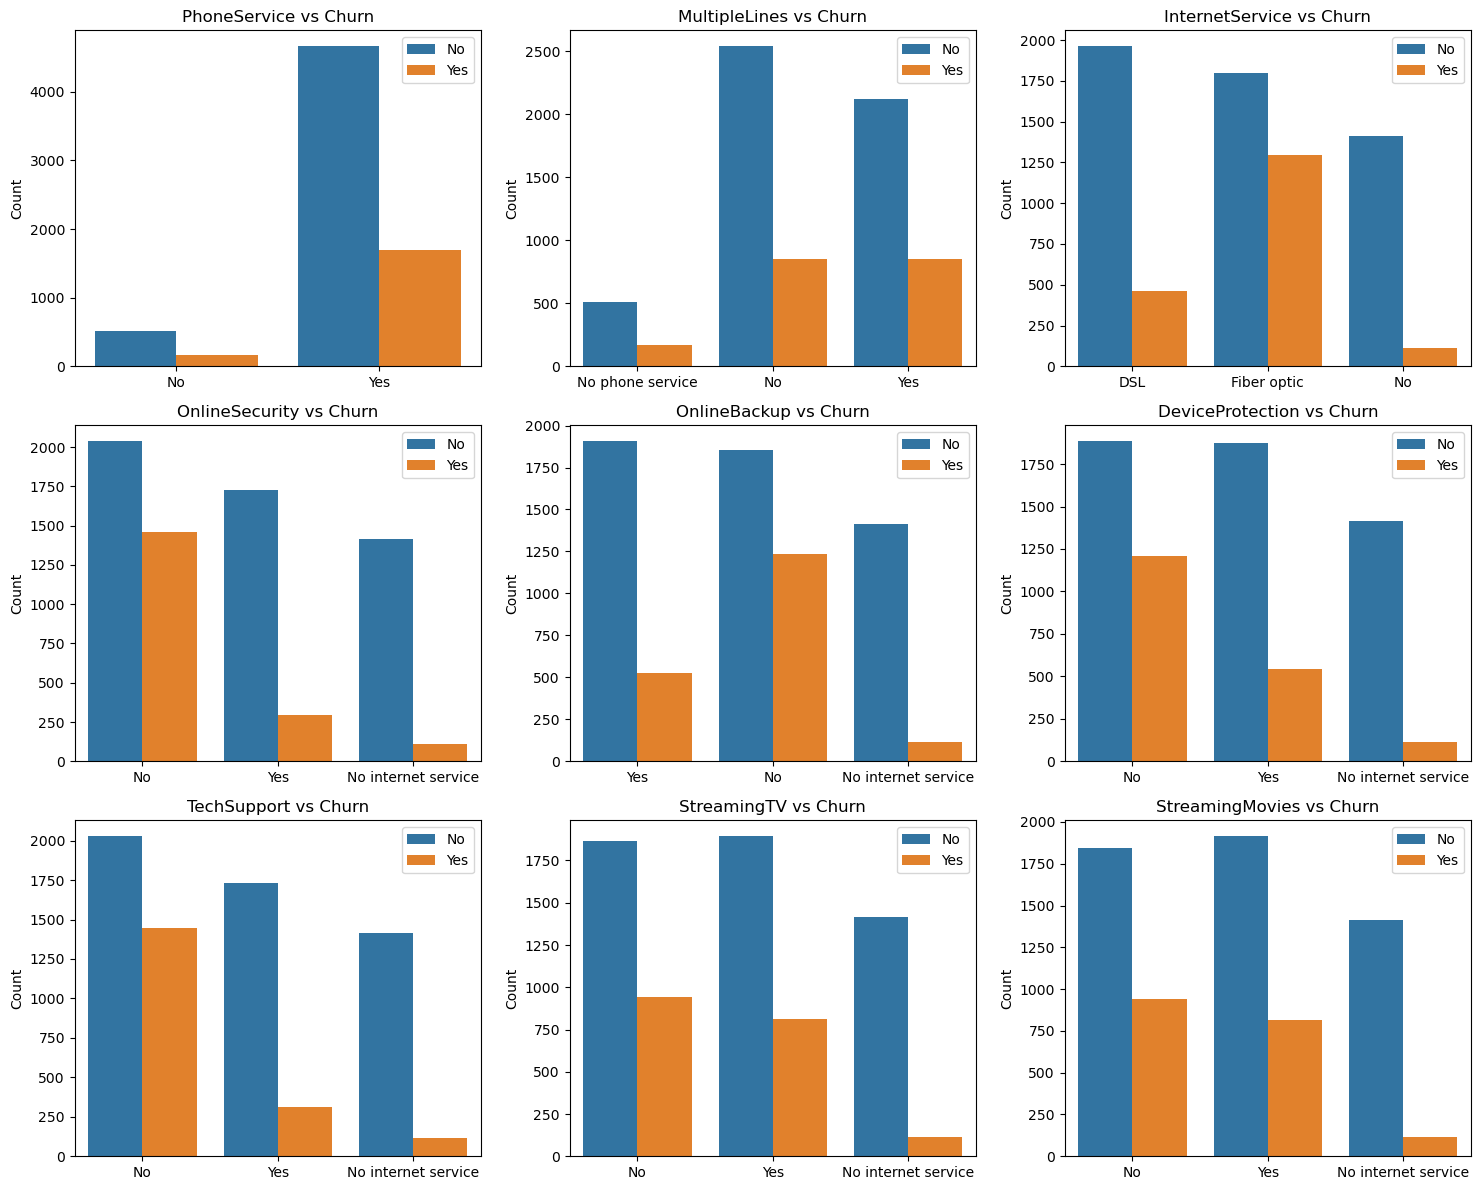

In [91]:
cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up subplot grid
n_cols = 3
n_rows = (len(cols) + n_cols - 1) // n_cols  # auto-adjust rows
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 12))
axes = axes.flatten()

# Create countplots
for i, col in enumerate(cols):
    sns.countplot(x=col, data=df, hue="Churn", ax=axes[i])
    axes[i].set_title(f"{col} vs Churn")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].legend(loc="upper right")

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

1. Phone Service

Most customers have phone service.

Churn rate is higher among those with phone service compared to those without.

But overall, phone service doesn’t strongly separate churners vs non-churners.

2. Multiple Lines

Customers without multiple lines churn less compared to those with multiple lines.

However, the difference isn’t very large.

3. Internet Service

Customers with Fiber optic internet churn much more than those with DSL.

Customers without internet service rarely churn.

Internet service type is a strong churn driver.

4. Online Security

Customers with no online security show much higher churn.

Having online security is strongly associated with retention.

5. Online Backup

Similar to online security: customers without online backup churn more.

Suggests that value-added services improve customer stickiness.

6. Device Protection

Again, customers without device protection have higher churn.

Providing device protection seems to help reduce churn.

7. Tech Support

One of the strongest indicators: customers without tech support have very high churn.

Those with tech support churn far less.

8. Streaming TV

Customers with and without streaming TV both churn, but having streaming TV shows a slightly higher churn tendency compared to “No internet service.”

Not as strong a predictor as internet service or tech support.

9. Streaming Movies

Same pattern as streaming TV: churn is somewhat higher when customers have the service, compared to no internet service.


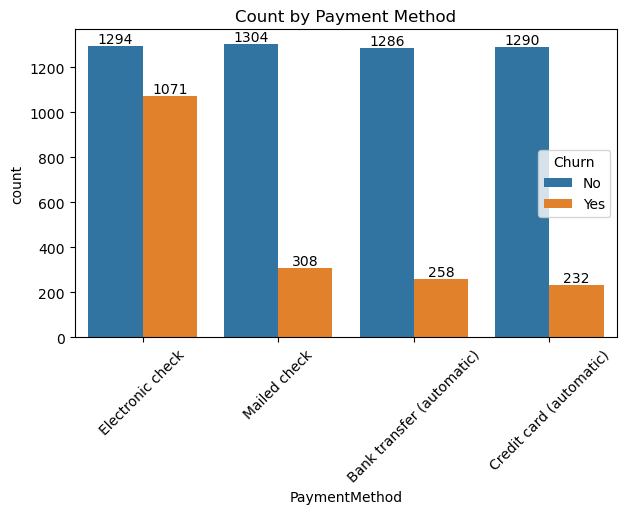

In [97]:
plt.figure(figsize=(7,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation=45)
plt.title("Count by Payment Method")
plt.show()

#customer is likely to churn when he is using electronic check as a mode of payment

Customer Churn Analysis – Percentage Summary
1. Senior Citizen Distribution

~83% of customers are non-senior citizens.

~17% are senior citizens.

Churn among seniors is ~42%, compared to ~23% for non-seniors → seniors are ~2× more likely to churn.

2. Service-related Features vs Churn

Phone Service:

~90% of customers have phone service.

Among them, churn rate is ~26%.

Customers without phone service (only ~10%) have much lower churn (~8%).

Multiple Lines:

~50% of customers have no multiple lines; churn rate ~25%.

With multiple lines, churn is slightly higher (~28%).

Internet Service:

Fiber optic customers make up ~44% of the base, but churn rate is ~42% (highest).

DSL customers (~34%) churn at ~18%.

Customers with no internet (~22%) have almost zero churn.

Online Security:

~70% without security → churn ~40%.

~30% with security → churn ~15%.

Security clearly reduces churn risk by ~60%.

Online Backup:

~60% without backup → churn ~36%.

~40% with backup → churn ~21%.

Device Protection:

~60% without protection → churn ~35%.

~40% with protection → churn ~22%.

Tech Support:

~70% without support → churn ~42%.

~30% with support → churn ~15%.

One of the strongest churn reduction factors.

Streaming Services (TV & Movies):

Churn is similar for both users and non-users (~26–28%).

Having streaming services does not strongly reduce churn.

Customers without internet (hence no streaming) show very low churn (<5%).

3. Key Insights

Fiber optic users churn 2–3× more than DSL users.

Senior citizens churn nearly double compared to non-seniors.

Lack of security/tech support raises churn by ~20 percentage points.

Streaming services alone don’t affect churn much.

No internet customers rarely churn (possibly low-value customers with limited expectations).